# R03 measurements

19.02.2026

In [6]:
import numpy as np
from scipy.integrate import cumulative_trapezoid as cumtrapz
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [29]:
L = 200e-3 #m
d = 70e-6 #m
A = np.pi * d**2 / 4

R0 = 0.370
R1 = 0.895
R2 = 0.923
R3 = 2.583
R4 = 2.600


## Only R0 load

Text(0.5, 1.0, 'After series of discharges')

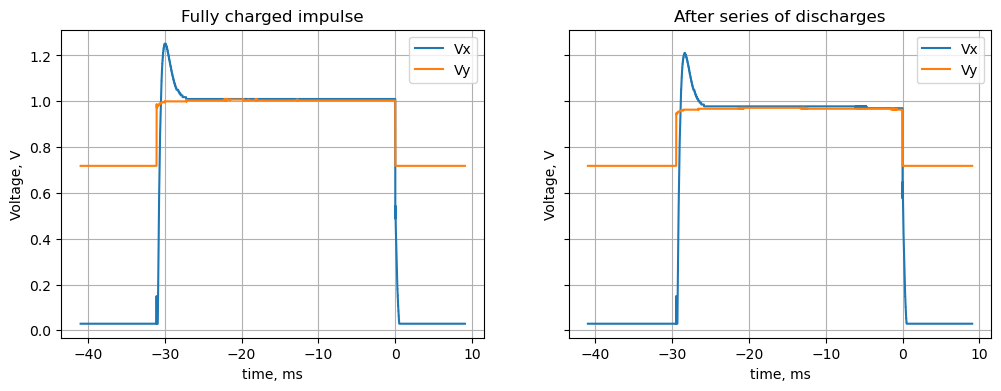

In [33]:
fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=True)

t, vx, vy = np.loadtxt('0.csv', delimiter=',', skiprows=1).T
ax[0].plot(t*1e3, vx, label='Vx')
ax[0].plot(t*1e3, vy, label='Vy')
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('time, ms')
ax[0].set_ylabel('Voltage, V')
ax[0].set_title('Fully charged impulse')

t, vx, vy = np.loadtxt('0_2.csv', delimiter=',', skiprows=1).T
ax[1].plot(t*1e3, vx, label='Vx')
ax[1].plot(t*1e3, vy, label='Vy')
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel('time, ms')
ax[1].set_ylabel('Voltage, V')
ax[1].set_title('After series of discharges')


## R1 load

https://srd.nist.gov/JPCRD/jpcrd155.pdf

Text(0, 0.5, 'Sample resistance, Ohm')

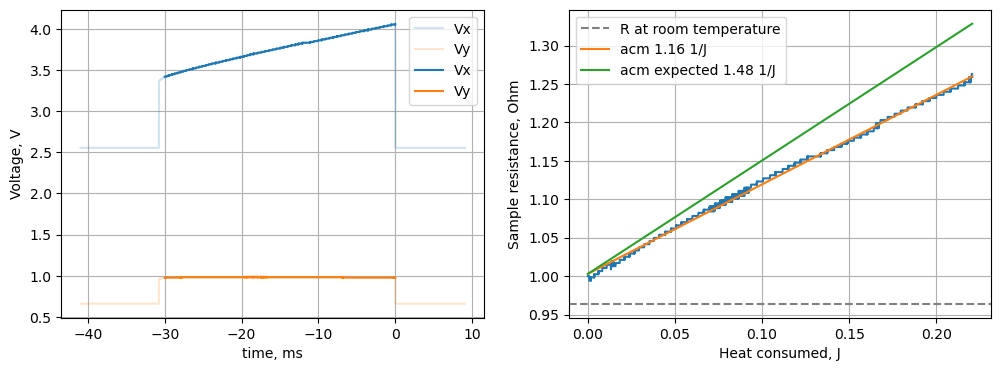

In [76]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

t, vx, vy = np.loadtxt('1.csv', delimiter=',', skiprows=1).T
Rrt = R1 # measurements at room temperature

ax[0].plot(t*1e3, vx, alpha=0.2, label='Vx')
ax[0].plot(t*1e3, vy, alpha=0.2, label='Vy')
t0 = -30e-3
t1 = 0e-3
mask = (t0 < t) & (t < t1)
t = t[mask]
vx, vy = vx[mask], vy[mask]
ax[0].plot(t*1e3, vx,  label='Vx', color='C0')
ax[0].plot(t*1e3, vy,  label='Vy', color='C1')

ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('time, ms')
ax[0].set_ylabel('Voltage, V')

V = vx - vy
I = vy / R0
P = V * I
R = V / I
Rrel = R / R[0] # realtive change of resistance

Q = cumtrapz(P, t, initial=0)
ax[1].plot(Q, Rrel)
ax[1].grid()
ax[1].axhline(Rrt/R[0], ls='--', color='gray', label='R at room temperature')

fit = linregress(Q, Rrel)
acm = fit.slope
ax[1].plot(Q, fit.intercept + acm * Q, label=f'acm {acm:.2f} 1/J')
rho_300 = 1.723e-8 # Ohm m, at 300K
rho_400 = 2.400e-8
heat_cap = 386 # J / kg /K
dens = 8960 # kg / m3
alpha = (rho_400 / rho_300 - 1) / 100
section = rho_300 / Rrt * L 
mass = dens * L * section
acm_expected = alpha / heat_cap / mass
ax[1].plot(Q, fit.intercept + acm_expected * Q, label=f'acm expected {acm_expected:.2f} 1/J')

ax[1].legend()
ax[1].set_xlabel('Heat consumed, J')
ax[1].set_ylabel('Sample resistance, Ohm')


## R2


Text(0, 0.5, 'Sample resistance, Ohm')

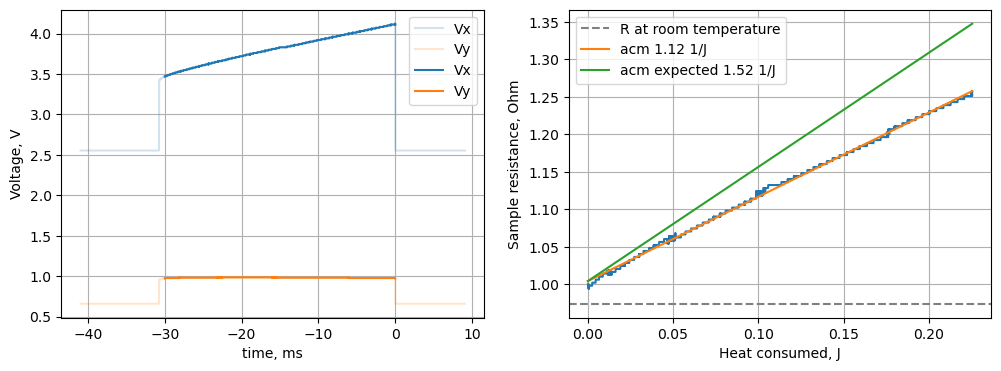

In [77]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

t, vx, vy = np.loadtxt('2.csv', delimiter=',', skiprows=1).T
Rrt = R2 # measurements at room temperature

ax[0].plot(t*1e3, vx, alpha=0.2, label='Vx')
ax[0].plot(t*1e3, vy, alpha=0.2, label='Vy')
t0 = -30e-3
t1 = 0e-3
mask = (t0 < t) & (t < t1)
t = t[mask]
vx, vy = vx[mask], vy[mask]
ax[0].plot(t*1e3, vx,  label='Vx', color='C0')
ax[0].plot(t*1e3, vy,  label='Vy', color='C1')

ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('time, ms')
ax[0].set_ylabel('Voltage, V')

V = vx - vy
I = vy / R0
P = V * I
R = V / I
Rrel = R / R[0] # realtive change of resistance

Q = cumtrapz(P, t, initial=0)
ax[1].plot(Q, Rrel)
ax[1].grid()
ax[1].axhline(Rrt/R[0], ls='--', color='gray', label='R at room temperature')

fit = linregress(Q, Rrel)
acm = fit.slope
ax[1].plot(Q, fit.intercept + acm * Q, label=f'acm {acm:.2f} 1/J')
rho_300 = 1.723e-8 # Ohm m, at 300K
rho_400 = 2.400e-8
heat_cap = 386 # J / kg /K
dens = 8960 # kg / m3
alpha = (rho_400 / rho_300 - 1) / 100
section = rho_300 / Rrt * L 
mass = dens * L * section
acm_expected = alpha / heat_cap / mass
ax[1].plot(Q, fit.intercept + acm_expected * Q, label=f'acm expected {acm_expected:.2f} 1/J')

ax[1].legend()
ax[1].set_xlabel('Heat consumed, J')
ax[1].set_ylabel('Sample resistance, Ohm')


## R3

https://srd.nist.gov/JPCRD/jpcrd258.pdf

Text(0, 0.5, 'Sample resistance, Ohm')

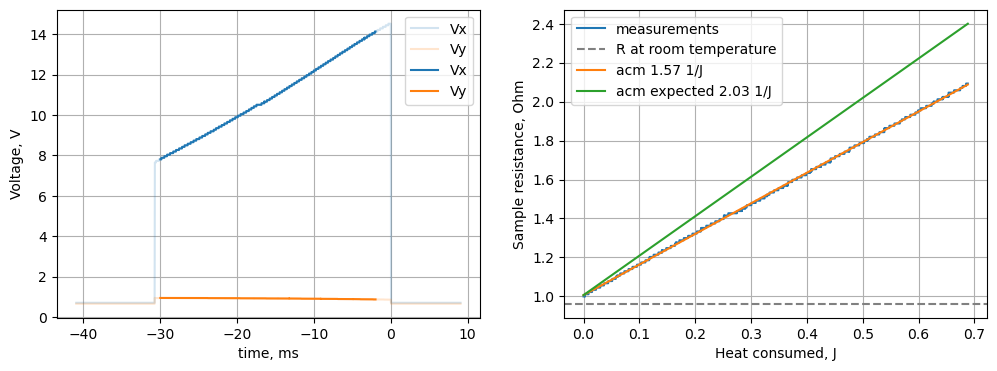

In [78]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

t, vx, vy = np.loadtxt('3.csv', delimiter=',', skiprows=1).T
Rrt = R3

ax[0].plot(t*1e3, vx, alpha=0.2, label='Vx')
ax[0].plot(t*1e3, vy, alpha=0.2, label='Vy')
t0 = -30e-3
t1 = -2e-3
mask = (t0 < t) & (t < t1)
t = t[mask]
vx, vy = vx[mask], vy[mask]
ax[0].plot(t*1e3, vx,  label='Vx', color='C0')
ax[0].plot(t*1e3, vy,  label='Vy', color='C1')

ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('time, ms')
ax[0].set_ylabel('Voltage, V')

V = vx - vy
I = vy / R0
P = V * I
R = V / I
Rrel = R / R[0] # realtive change of resistance
Q = cumtrapz(P, t, initial=0)
ax[1].plot(Q, Rrel, label='measurements')
ax[1].grid()
ax[1].axhline(Rrt/R[0], ls='--', color='gray', label='R at room temperature')

fit = linregress(Q, Rrel)
acm = fit.slope
ax[1].plot(Q, fit.intercept + acm * Q, label=f'acm {acm:.2f} 1/J')
rho_300 = 5.52e-8 # Ohm m, at 300K
rho_400 = 8.02e-8
heat_cap = 256 # J / kg /K
dens = 10220 # kg / m3
alpha = (rho_400 / rho_300 - 1) / 100
section = rho_300 / Rrt * L 
mass = dens * L * section
acm_expected = alpha / heat_cap / mass
ax[1].plot(Q, fit.intercept + acm_expected * Q, label=f'acm expected {acm_expected:.2f} 1/J')

ax[1].legend()
ax[1].set_xlabel('Heat consumed, J')
ax[1].set_ylabel('Sample resistance, Ohm')


## R4

Text(0, 0.5, 'Sample resistance, Ohm')

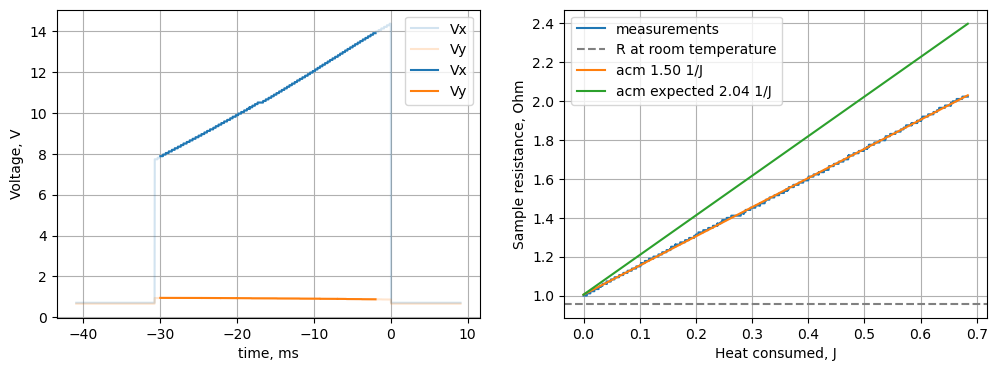

In [79]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

t, vx, vy = np.loadtxt('4.csv', delimiter=',', skiprows=1).T
Rrt = R4

ax[0].plot(t*1e3, vx, alpha=0.2, label='Vx')
ax[0].plot(t*1e3, vy, alpha=0.2, label='Vy')
t0 = -30e-3
t1 = -2e-3
mask = (t0 < t) & (t < t1)
t = t[mask]
vx, vy = vx[mask], vy[mask]
ax[0].plot(t*1e3, vx,  label='Vx', color='C0')
ax[0].plot(t*1e3, vy,  label='Vy', color='C1')

ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('time, ms')
ax[0].set_ylabel('Voltage, V')

V = vx - vy
I = vy / R0
P = V * I
R = V / I
Rrel = R / R[0] # realtive change of resistance
Q = cumtrapz(P, t, initial=0)
ax[1].plot(Q, Rrel, label='measurements')
ax[1].grid()
ax[1].axhline(Rrt/R[0], ls='--', color='gray', label='R at room temperature')

fit = linregress(Q, Rrel)
acm = fit.slope
ax[1].plot(Q, fit.intercept + acm * Q, label=f'acm {acm:.2f} 1/J')
rho_300 = 5.52e-8 # Ohm m, at 300K
rho_400 = 8.02e-8
heat_cap = 256 # J / kg /K
dens = 10220 # kg / m3
alpha = (rho_400 / rho_300 - 1) / 100
section = rho_300 / Rrt * L 
mass = dens * L * section
acm_expected = alpha / heat_cap / mass
ax[1].plot(Q, fit.intercept + acm_expected * Q, label=f'acm expected {acm_expected:.2f} 1/J')

ax[1].legend()
ax[1].set_xlabel('Heat consumed, J')
ax[1].set_ylabel('Sample resistance, Ohm')


## R3 R4 in series

Text(0, 0.5, 'Sample resistance, Ohm')

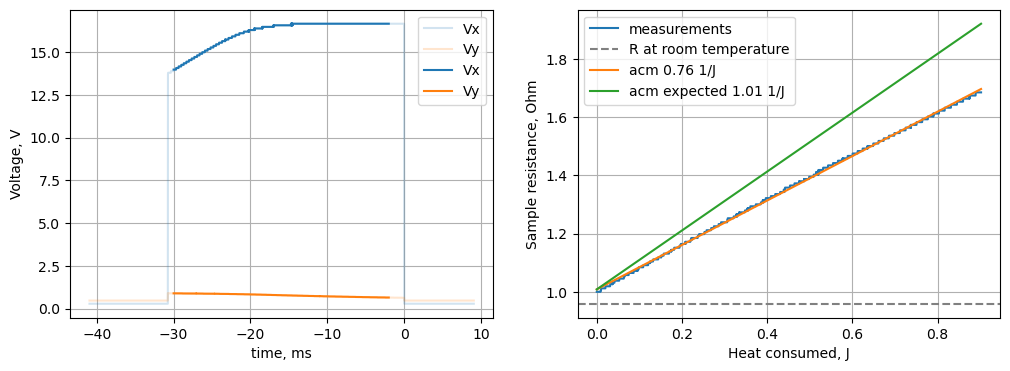

In [82]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

t, vx, vy = np.loadtxt('34series.csv', delimiter=',', skiprows=1).T
Rrt = R3 + R4

ax[0].plot(t*1e3, vx, alpha=0.2, label='Vx')
ax[0].plot(t*1e3, vy, alpha=0.2, label='Vy')
t0 = -30e-3
t1 = -2e-3
mask = (t0 < t) & (t < t1)
t = t[mask]
vx, vy = vx[mask], vy[mask]
ax[0].plot(t*1e3, vx,  label='Vx', color='C0')
ax[0].plot(t*1e3, vy,  label='Vy', color='C1')

ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('time, ms')
ax[0].set_ylabel('Voltage, V')

V = vx - vy
I = vy / R0
P = V * I
R = V / I
Rrel = R / R[0] # realtive change of resistance
Q = cumtrapz(P, t, initial=0)
ax[1].plot(Q, Rrel, label='measurements')
ax[1].grid()
ax[1].axhline(Rrt/R[0], ls='--', color='gray', label='R at room temperature')

fit = linregress(Q, Rrel)
acm = fit.slope
ax[1].plot(Q, fit.intercept + acm * Q, label=f'acm {acm:.2f} 1/J')
rho_300 = 5.52e-8 # Ohm m, at 300K
rho_400 = 8.02e-8
heat_cap = 256 # J / kg /K
dens = 10220 # kg / m3
alpha = (rho_400 / rho_300 - 1) / 100
section = rho_300 / R3 * L  
mass = dens * L * section * 2
acm_expected = alpha / heat_cap / mass
ax[1].plot(Q, fit.intercept + acm_expected * Q, label=f'acm expected {acm_expected:.2f} 1/J')

ax[1].legend()
ax[1].set_xlabel('Heat consumed, J')
ax[1].set_ylabel('Sample resistance, Ohm')


## R1 and R2 in series

Text(0, 0.5, 'Sample resistance, Ohm')

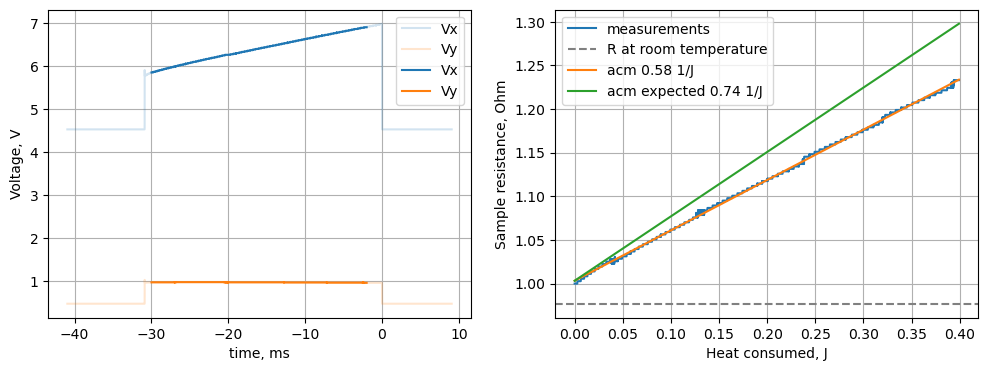

In [85]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

t, vx, vy = np.loadtxt('12series.csv', delimiter=',', skiprows=1).T
Rrt = R1 + R2

ax[0].plot(t*1e3, vx, alpha=0.2, label='Vx')
ax[0].plot(t*1e3, vy, alpha=0.2, label='Vy')
t0 = -30e-3
t1 = -2e-3
mask = (t0 < t) & (t < t1)
t = t[mask]
vx, vy = vx[mask], vy[mask]
ax[0].plot(t*1e3, vx,  label='Vx', color='C0')
ax[0].plot(t*1e3, vy,  label='Vy', color='C1')

ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('time, ms')
ax[0].set_ylabel('Voltage, V')

V = vx - vy
I = vy / R0
P = V * I
R = V / I
Rrel = R / R[0] # realtive change of resistance
Q = cumtrapz(P, t, initial=0)
ax[1].plot(Q, Rrel, label='measurements')
ax[1].grid()
ax[1].axhline(Rrt/R[0], ls='--', color='gray', label='R at room temperature')

fit = linregress(Q, Rrel)
acm = fit.slope
ax[1].plot(Q, fit.intercept + acm * Q, label=f'acm {acm:.2f} 1/J')
rho_300 = 1.723e-8 # Ohm m, at 300K
rho_400 = 2.400e-8
heat_cap = 386 # J / kg /K
dens = 8960 # kg / m3
alpha = (rho_400 / rho_300 - 1) / 100
section = rho_300 / R1 * L  
mass = dens * L * section * 2
acm_expected = alpha / heat_cap / mass
ax[1].plot(Q, fit.intercept + acm_expected * Q, label=f'acm expected {acm_expected:.2f} 1/J')

ax[1].legend()
ax[1].set_xlabel('Heat consumed, J')
ax[1].set_ylabel('Sample resistance, Ohm')


# R1 and R2 in parallel


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

t, vx, vy = np.loadtxt('12parallel.csv', delimiter=',', skiprows=1).T
Rrt = R1 * R2 / (R1 + R2)

ax[0].plot(t*1e3, vx, alpha=0.2, label='Vx')
ax[0].plot(t*1e3, vy, alpha=0.2, label='Vy')
t0 = -30e-3
t1 = -2e-3
mask = (t0 < t) & (t < t1)
t = t[mask]
vx, vy = vx[mask], vy[mask]
ax[0].plot(t*1e3, vx,  label='Vx', color='C0')
ax[0].plot(t*1e3, vy,  label='Vy', color='C1')

ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('time, ms')
ax[0].set_ylabel('Voltage, V')

V = vx - vy
I = vy / R0
P = V * I
R = V / I
Rrel = R / R[0] # realtive change of resistance
Q = cumtrapz(P, t, initial=0)
ax[1].plot(Q, Rrel, label='measurements')
ax[1].grid()
ax[1].axhline(Rrt/R[0], ls='--', color='gray', label='R at room temperature')

fit = linregress(Q, Rrel)
acm = fit.slope
ax[1].plot(Q, fit.intercept + acm * Q, label=f'acm {acm:.2f} 1/J')
rho_300 = 1.723e-8 # Ohm m, at 300K
rho_400 = 2.400e-8
heat_cap = 386 # J / kg /K
dens = 8960 # kg / m3
alpha = (rho_400 / rho_300 - 1) / 100
section = rho_300 / R1 * L  
mass = dens * L * section * 2
acm_expected = alpha / heat_cap / mass
ax[1].plot(Q, fit.intercept + acm_expected * Q, label=f'acm expected {acm_expected:.2f} 1/J')

ax[1].legend()
ax[1].set_xlabel('Heat consumed, J')
ax[1].set_ylabel('Sample resistance, Ohm')
